# [BAT512] Advanced Data Mining with AI <br/><br/> 6주차 실습자료

- 라이브러리 임포트

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터 탐색

- 데이터 로드
    - Iris (붓꽃) 데이터(Scikit-learn 제공)

In [3]:
from sklearn import datasets
rawdata = datasets.load_iris()

- 데이터셋 통합

In [10]:
data_target = np.concatenate([rawdata["data"], rawdata["target"].reshape(-1,1)], axis=1)

In [11]:
data_target.shape

(150, 5)

In [14]:
independent_variables = rawdata["feature_names"]
dependent_variable = ["Target"]
feature_list = independent_variables+dependent_variable

In [15]:
data = pd.DataFrame(data_target, columns=feature_list)

- 데이터 형태 확인

In [16]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [17]:
data.shape

(150, 5)

In [20]:
print(rawdata["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

- 데이터 시각화

원본 데이터 분포

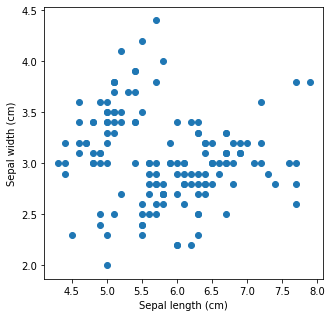

In [37]:
plt.figure(figsize=(5,5))
plt.scatter(data["sepal length (cm)"], data["sepal width (cm)"])
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.show()

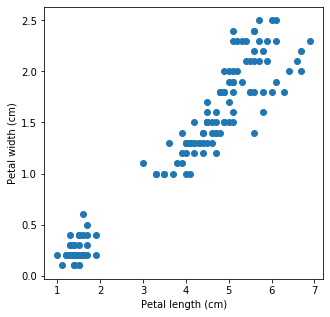

In [39]:
plt.figure(figsize=(5,5))
plt.scatter(data["petal length (cm)"], data["petal width (cm)"])
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.show()

레이블 표시

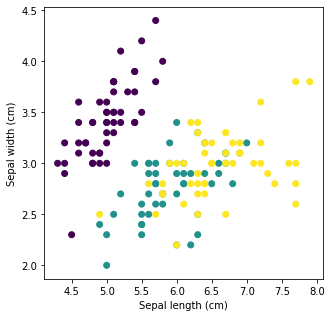

In [45]:
plt.figure(figsize=(5,5))
plt.scatter(data["sepal length (cm)"], data["sepal width (cm)"], c=data["Target"])
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.show()

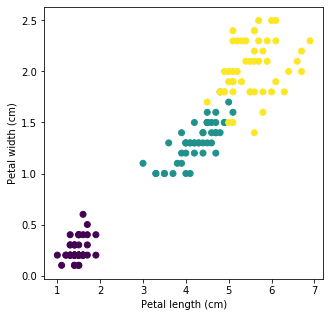

In [46]:
plt.figure(figsize=(5,5))
plt.scatter(data["petal length (cm)"], data["petal width (cm)"], c=data["Target"])
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.show()

## 데이터 정제

- 변수 변환

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(data[independent_variables])

In [25]:
X = pd.DataFrame(X, columns=independent_variables)

In [26]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [28]:
y = data["Target"]

In [29]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: Target, Length: 150, dtype: float64

## K-means clustering

- KMeans 군집화 실시

In [49]:
from sklearn.cluster import KMeans

inertias = []
for K in range(1, 11):
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

- Elbow method 시각화

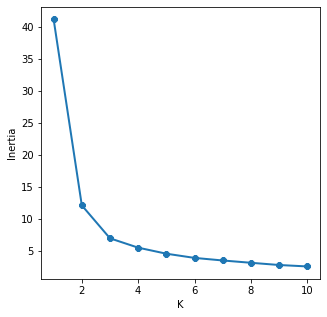

In [50]:
plt.figure(figsize=(5,5))
plt.plot(range(1,11), inertias, linewidth=2, marker='8')
plt.xlabel("K")
plt.ylabel("Inertia")
plt.show()

Elbow method 결과 최적의 K값은 3으로 선정

- 최적의 K값을 사용한 Kmeans 군집화

In [66]:
kmeans = KMeans(n_clusters=3)
clusters_kmeans = kmeans.fit_predict(X)
print(clusters_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 2 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [52]:
print(kmeans.cluster_centers_)

[[0.19611111 0.595      0.07830508 0.06083333]
 [0.44125683 0.30737705 0.57571548 0.54918033]
 [0.70726496 0.4508547  0.79704476 0.82478632]]


- 군집화 결과 시각화

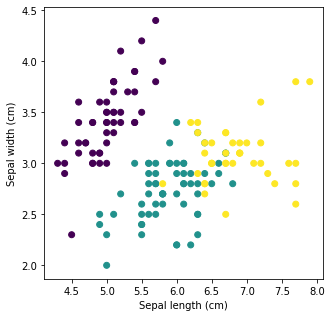

In [67]:
plt.figure(figsize=(5,5))
plt.scatter(data["sepal length (cm)"], data["sepal width (cm)"], c=clusters_kmeans)
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.show()

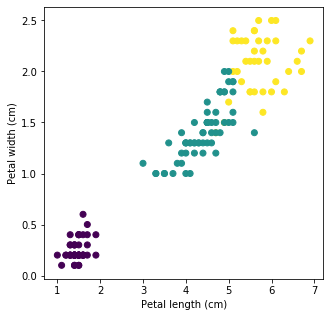

In [68]:
plt.figure(figsize=(5,5))
plt.scatter(data["petal length (cm)"], data["petal width (cm)"], c=clusters_kmeans)
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.show()

- 실루엣 계수 산출

In [69]:
from sklearn.metrics import silhouette_score

print("Silhouette score:", silhouette_score(X, clusters_kmeans, metric="euclidean"))

Silhouette score: 0.5047687565398589


## DBSCAN

- DBSCAN 군집화 실시

In [70]:
from sklearn.cluster import DBSCAN

epsilon = 0.3
minPts = 4
dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
dbscan.fit(X)

clusters_dbscan = dbscan.labels_

- 핵심/비핵심 데이터 구분

In [73]:
core_samples_mask = np.zeros_like(clusters_dbscan, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

- DBSCAN 군집화 결과

In [84]:
n_clusters = sum(np.unique(clusters_dbscan)!=-1)
print("Number of clusters:",n_clusters)

n_noise = list(clusters_dbscan).count(-1)
print("Number of noise points:",n_noise)

Number of clusters: 2
Number of noise points: 1


In [119]:
unique_clusters = np.unique(clusters_dbscan)
colors = plt.cm.Spectral(np.linspace(0.5, 1, len(unique_clusters))) #군집에 따라 색깔 지정

- DBSCAN 군집화 결과 시각화

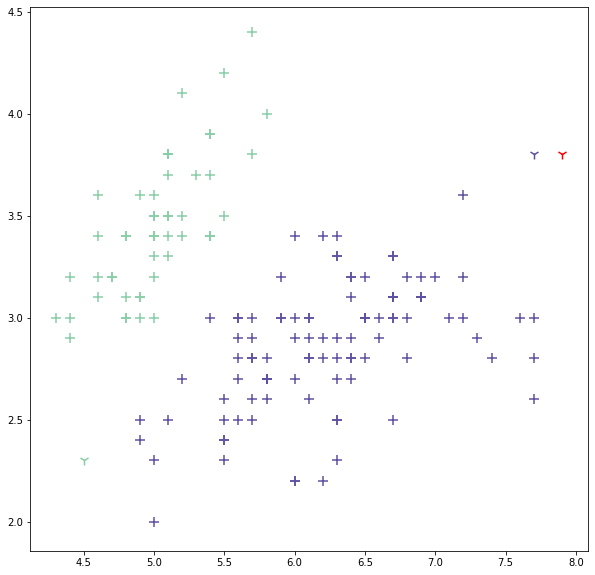

In [125]:
plt.figure(figsize=(10,10))

for k, col in zip(unique_clusters, colors):
    if k == -1:
        col = "red"
    class_member_mask = (clusters_dbscan==k)
    xy = data[["sepal length (cm)", "sepal width (cm)"]].values[class_member_mask & core_samples_mask] # 핵심 데이터이면서 현재 군집에 해당하는 데이터 표시
    if len(xy)>0:
        plt.scatter(xy[:,0], xy[:,1], s=100, c=[col], marker="+")
    xy = data[["sepal length (cm)", "sepal width (cm)"]].values[class_member_mask & ~core_samples_mask] # 핵심 데이터가 아니면서 현재 군집에 해당하는 데이터 표시
    if len(xy)>0:
        plt.scatter(xy[:,0], xy[:,1], s=100, c=[col], marker="1")
plt.show()

- 실루엣 계수 산출

In [127]:
from sklearn.metrics import silhouette_score

print("Silhouette score:", silhouette_score(X, clusters_dbscan, metric="euclidean"))

Silhouette score: 0.4681853590627473
